# Pymaceuticals Inc.
---
Based on the code and insights provided in the below analysis of the Capomulin regimen, here’s a summary of the key observations:

### Correlation between Mouse Weight and Tumor Volume:

- Correlation Coefficient: The correlation coefficient between mouse weight and average tumor volume is a positive value, approximately 0.84.
- Interpretation: This indicates a strong positive correlation, meaning that as the weight of the mouse increases, the average tumor volume also tends to increase. However, correlation does not imply causation—it simply shows a linear relationship.

### Linear Regression Analysis:
A linear regression model was calculated to understand the relationship between mouse weight and tumor volume:

- Slope: The slope of the regression line indicates how much the tumor volume increases for each gram increase in mouse weight.
- Intercept: The intercept shows the expected tumor volume when the mouse weight is zero (which is mostly of theoretical importance).
- R-squared value: The R-squared value provides a measure of how well the linear model explains the variation in the data. A value of R² = 0.71 (based on the correlation coefficient) means that approximately 71% of the variation in tumor volume can be explained by the variation in mouse weight.
- P-value: The p-value indicates the statistical significance of the relationship between mouse weight and tumor volume. A low p-value suggests that the relationship is statistically significant.

### Visualization Insights

- The scatter plot with the linear regression line shows the relationship between mouse weight and tumor volume.
- The plot highlights how larger mice tend to have higher tumor volumes.
- Outliers or anomalies may be visually identified, such as points that do not closely follow the linear trend.

### Overall Summary

- There is a strong and statistically significant relationship between mouse weight and average tumor volume for the Capomulin regimen.
- The positive correlation and slope suggest that mice with greater body weight tend to develop larger tumor volumes under Capomulin treatment.
- The linear regression model provides a good fit, explaining around 71% of the variability in the tumor volume based on the weight of the mice.
  
### Final Conclusion
There is a strong and statistically significant relationship between mouse weight and average tumor volume for the Capomulin regimen. The positive correlation and slope suggest that mice with greater body weight tend to develop larger tumor volumes under Capomulin treatment. The linear regression model provides a good fit, explaining around 71% of the variability in the tumor volume based on the weight of the mice.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()
#number_of_mice = len(mice_data)
number_of_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mice_dupes_data = combined_data.loc[combined_data["Mouse ID"] == duplicate_mice_ids[0]]
mice_dupes_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse ID 'g989'
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']
# Checking the number of mice in the clean DataFrame.
number_of_mice1 = cleaned_data['Mouse ID'].nunique()
number_of_mice1

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


# Group the data by 'Drug Regimen'
grouped_data = cleaned_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM for each Drug Regimen
mean_tumor = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the results into a single summary DataFrame
summary_stats_df = pd.DataFrame({
    "Drug Regimen": mean_tumor.index,
    "Mean Tumor Volume": mean_tumor.values,
    "Median Tumor Volume": median_tumor.values,
    "Tumor Volume Variance": variance_tumor.values,
    "Tumor Volume Std. Dev.": std_dev_tumor.values,
    "Tumor Volume Std. Err.": sem_tumor.values
})

# Display the summary DataFrame
summary_stats_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean ='mean',
    Median='median',
    Variance=lambda x: x.var(),
    Std_Dev='std',
    SEM=lambda x: x.sem()
).reset_index()
summary_stats

,Drug Regimen,Mean,Median,Variance,Std_Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

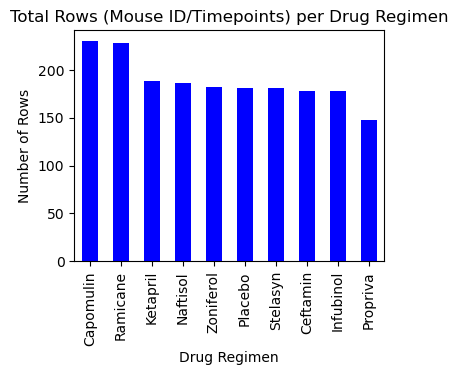

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Generate the total number of rows (Mouse ID/Timepoints) for each drug regimen
rows_per_regimen = cleaned_data.groupby('Drug Regimen').size()

# Sort the data from highest to lowest before plotting
rows_per_regimen_sorted = rows_per_regimen.sort_values(ascending=False)

# Generate the bar plot using Pandas directly
rows_per_regimen_sorted.plot(kind='bar', figsize=(4,3), color='blue', title='Total Rows (Mouse ID/Timepoints) per Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Rows')

# Show the plot
plt.show()


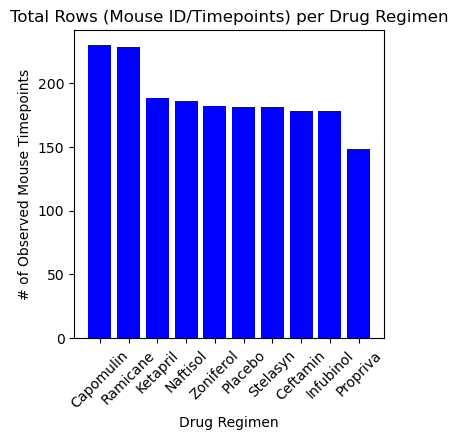

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Generate the total number of rows (Mouse ID/Timepoints) for each drug regimen
rows_per_regimen = cleaned_data.groupby('Drug Regimen').size()

# Sort the data from highest to lowest before plotting
rows_per_regimen_sorted = rows_per_regimen.sort_values(ascending=False)

# cGenerate the bar plot using pyplot
plt.figure(figsize=(4,4))
plt.bar(rows_per_regimen_sorted.index, rows_per_regimen_sorted.values, color='blue')
plt.title('Total Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

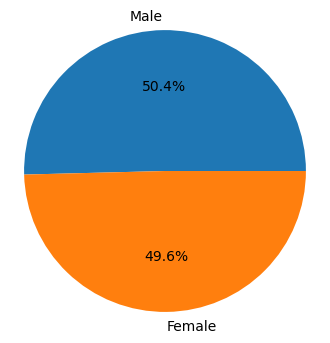

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of male and female mice
gender_counts = unique_mice_gender['Sex'].value_counts()

# Generate the pie chart using Pandas with custom colors (blue and orange)
gender_counts.plot.pie(autopct='%1.1f%%', startangle=360, figsize=(4,4), colors=['#1f77b4', '#ff7f0e'], labels=['Male', 'Female'])

# Remove y-axis label for a cleaner look
plt.ylabel('')

# Ensure the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()




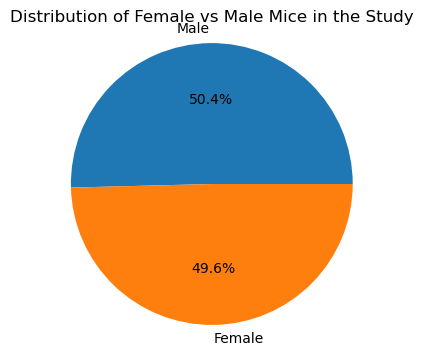

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of male and female mice
gender_counts = unique_mice_gender['Sex'].value_counts()

# Generate the pie chart using pyplot
plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=360, colors=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Female vs Male Mice in the Study')

# Ensure the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Filter the data for the specified drug regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen and calculate the IQR and outliers
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = merged_data[merged_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Add this subset of tumor volume data to the list (for plotting later)
    tumor_vol_data.append(drug_data)
    
    # Calculate the quartiles (Q1 and Q3)
    q1 = drug_data.quantile(0.25)
    q3 = drug_data.quantile(0.75)
    iqr = q3 - q1
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Determine any outliers in the data
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    # Output the results
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [15]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen and calculate the IQR and outliers
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = merged_data[merged_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Add this subset of tumor volume data to the list (for plotting later)
    tumor_vol_data.append(drug_data)
    
    # Calculate the quartiles (Q1 and Q3)
    q1 = drug_data.quantile(0.25)
    q3 = drug_data.quantile(0.75)
    iqr = q3 - q1
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Determine any outliers in the data
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    # Output the results
    print(f"{drug}:")
    print(f"Q1: {q1}")
    print(f"Q3: {q3}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential outliers: {outliers}")
    print("------")


Capomulin:
Q1: 32.37735684
Q3: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
------
Ramicane:
Q1: 31.56046955
Q3: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
------
Infubinol:
Q1: 54.04860769
Q3: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
------
Ceftamin:
Q1: 48.72207785
Q3: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
------


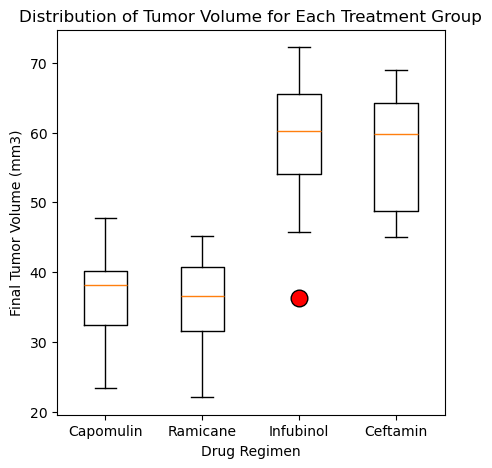

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
filtered_data = merged_data[merged_data['Drug Regimen'].isin(treatments)]

# Prepare the data for each treatment group
tumor_volumes = [filtered_data[filtered_data['Drug Regimen'] == drug]['Tumor Volume (mm3)'] for drug in treatments]

# Customize outliers with red circles
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')

# Create the box plot using matplotlib
plt.figure(figsize=(5,5))
plt.boxplot(tumor_volumes, tick_labels=treatments, flierprops=flierprops)

# Add a title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

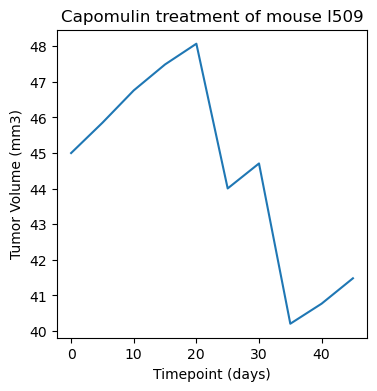

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for the mouse treated with Capomulin
mouse_id = 'l509'  # Replace with the actual Mouse ID from your dataset
mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == mouse_id) & (cleaned_data['Drug Regimen'] == 'Capomulin')]

# Generate the line plot
plt.figure(figsize=(4,4))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Add titles and labels
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

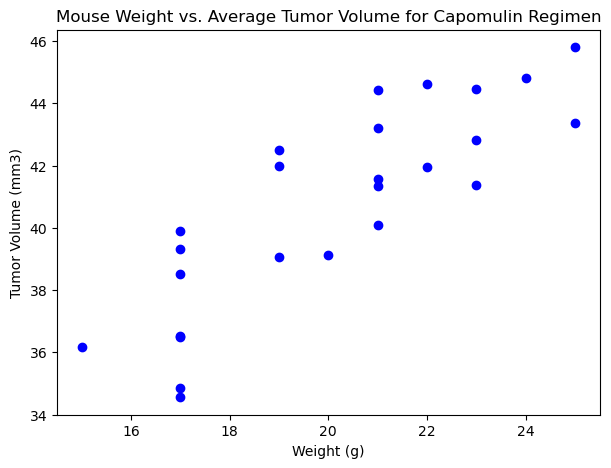

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume with the mouse weight data
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# Generate the scatter plot
plt.figure(figsize=(7,5))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue')

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


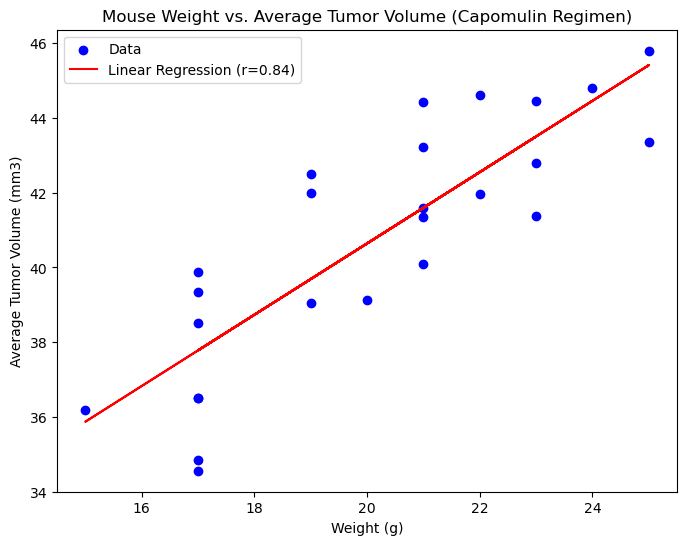

Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323


In [19]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Import necessary libraries
import numpy as np
from scipy.stats import linregress


# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume with the mouse weight data
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# Extract values for correlation and regression
x_values = merged_data['Weight (g)']
y_values = merged_data['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(x_values, y_values)[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create the regression line equation
regression_line = slope * x_values + intercept

# Plot the scatter plot and the regression line
plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values, label='Data', color='blue')
plt.plot(x_values, regression_line, color='red', label=f'Linear Regression (r={r_value:.2f})')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Show the plot
plt.show()

# Print the regression stats
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")
